<a href="https://colab.research.google.com/github/User28198/DS_tasks/blob/main/Assignment_5_6_7_26_11_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


No data cleaning and encoding is required

<function matplotlib.pyplot.show(*args, **kw)>

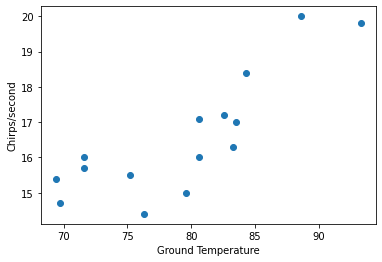

In [4]:
plt.scatter(df['Ground Temperature'], df['Chirps/Second'])
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/second')
plt.show

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df['Ground Temperature']
y = df['Chirps/Second']

In [7]:
print(X.shape, y.shape)

(15,) (15,)


In [8]:
X = X.to_numpy().reshape(-1,1)    #changing to 2D as "#ValueError: Expected 2D array, got 1D array instead:" when we apply fit()
y = y.to_numpy()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression() 

In [11]:
lr.fit(X, y)

LinearRegression()

In [12]:
print('intercept:', lr.intercept_)
print('coefficient:', lr.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


**y = 0.4593x + 0.203**

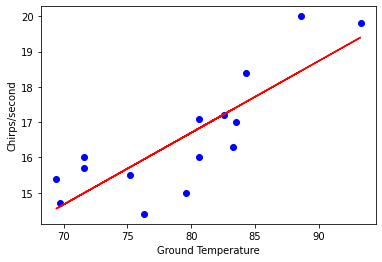

In [13]:
plt.scatter(X, y, color = 'b')
plt.plot(X, lr.predict(X), color = 'r')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/second')
plt.show()

In [14]:
lr.score(X, y)

0.6922946529146998

In [15]:
#when ground temp is 95
new_X = [[95]]
y_pred = lr.predict(new_X )
print(y_pred)

[19.74428913]


In [16]:
#when chirps per second is 18.......changing the feature and target variable

X1 = df['Chirps/Second']
y1 = df['Ground Temperature']

In [17]:
X1 = X1.to_numpy().reshape(-1,1)    #changing to 2D as "#ValueError: Expected 2D array, got 1D array instead:" when we apply fit()
y1 = y1.to_numpy()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr1 = LinearRegression() 

In [20]:
lr1.fit(X1, y1)

LinearRegression()

In [21]:
print('intercept:', lr1.intercept_)
print('coefficient:', lr1.coef_)

intercept: 22.848982308066887
coefficient: [3.410323]


In [22]:
lr1.score(X1, y1)

0.6922946529147003

In [23]:
#when chirps per second is 18
new_X1 = [[18]]
y1_pred = lr1.predict(new_X1)
print(y1_pred)

[84.2347963]


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [25]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [26]:
df.shape

(62, 2)

In [27]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

Text(0, 0.5, 'Body')

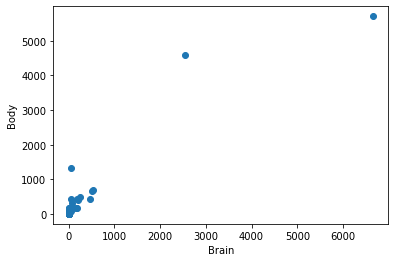

In [28]:
plt.scatter(df['Brain'], df['Body'])
plt.xlabel('Brain')
plt.ylabel('Body')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


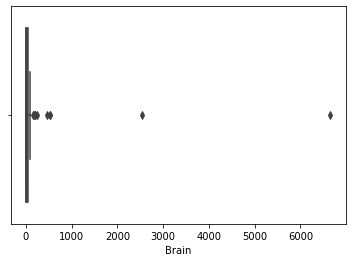

In [29]:
sns.boxplot(df['Brain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


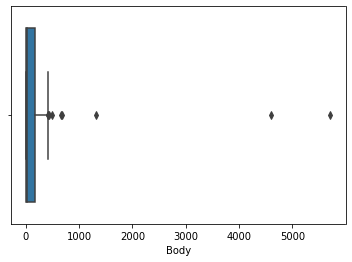

In [30]:
sns.boxplot(df['Body'])

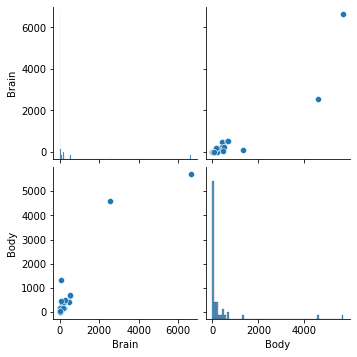

In [31]:
sns.pairplot(df)

In [32]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [33]:
#finding outliers

q1_brain = df['Brain'].quantile(0.25)
q3_brain = df['Brain'].quantile(0.75)
iqr_brain = q3_brain - q1_brain
lower_limit_brain = q1_brain - (1.5*iqr_brain)
upper_limit_brain = q3_brain + (1.5*iqr_brain)
print('Lower Limit_Brain:', lower_limit_brain,'\n','Upper Limit_Brain:', upper_limit_brain)

Lower Limit_Brain: -70.80375000000001 
 Upper Limit_Brain: 119.60625


In [34]:
q1_body = df['Body'].quantile(0.25)
q3_body = df['Body'].quantile(0.75)
iqr_body = q3_body - q1_body
lower_limit_body = q1_body - (1.5*iqr_body)
upper_limit_body = q3_body + (1.5*iqr_body)
print('Lower Limit_Body:', lower_limit_body,'\n','Upper Limit_Body:', upper_limit_body)

Lower Limit_Body: -238.375 
 Upper Limit_Body: 408.625


In [35]:
df.loc[df['Brain']> upper_limit_brain]

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


In [36]:
#removing outliers

outliers = df.loc[df['Brain'] > upper_limit_brain].index
outliers

Int64Index([3, 18, 20, 21, 27, 28, 32, 41, 55, 57], dtype='int64')

In [37]:
df = df.drop(outliers)
df.shape

(52, 2)

In [38]:
df.describe()

,Brain,Body
count,52.000000,52.000000
mean,11.786135,73.410000
std,23.094135,195.748303
min,0.005000,0.140000
25%,0.388750,3.375000
50%,1.660000,12.200000
75%,4.916000,56.500000
max,100.000000,1320.000000


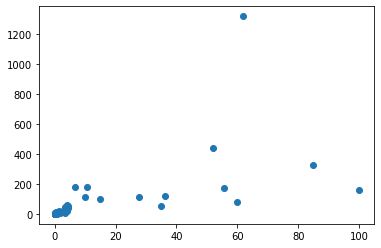

In [39]:
plt.scatter(df['Brain'], df['Body'])

In [40]:
outliers1 = df.loc[df['Body'] > upper_limit_body].index
outliers1

Int64Index([31, 45], dtype='int64')

In [41]:
df = df.drop(outliers1)
df.shape

(50, 2)

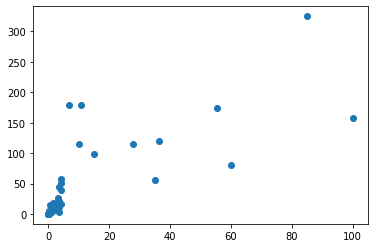

In [42]:
plt.scatter(df['Brain'], df['Body'])

In [43]:
df.describe()

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


In [44]:
#finding outliers

q1_brain = df['Brain'].quantile(0.25)
q3_brain = df['Brain'].quantile(0.75)
iqr_brain = q3_brain - q1_brain
lower_limit_brain = q1_brain - (1.5*iqr_brain)
upper_limit_brain = q3_brain + (1.5*iqr_brain)
print('Lower Limit_Brain:', lower_limit_brain,'\n','Upper Limit_Brain:', upper_limit_brain)

Lower Limit_Brain: -5.545000000000001 
 Upper Limit_Brain: 10.085


In [45]:
q1_body = df['Body'].quantile(0.25)
q3_body = df['Body'].quantile(0.75)
iqr_body = q3_body - q1_body
lower_limit_body = q1_body - (1.5*iqr_body)
upper_limit_body = q3_body + (1.5*iqr_body)
print('Lower Limit_Body:', lower_limit_body,'\n','Upper Limit_Body:', upper_limit_body)

Lower Limit_Body: -65.57499999999999 
 Upper Limit_Body: 117.62499999999999


In [46]:
outliers2 = df.loc[df['Brain'] > upper_limit_brain].index

In [47]:
df = df.drop(outliers2)

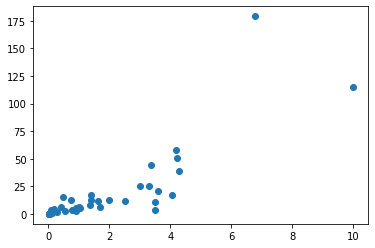

In [48]:
plt.scatter(df['Brain'], df['Body'])

In [49]:
X = df['Brain']
y = df['Body']

In [50]:
print(X.shape, y.shape)

(41,) (41,)


In [51]:
X = X.to_numpy().reshape(-1,1)    
y = y.to_numpy()

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression() 

In [54]:
lr.fit(X, y)

LinearRegression()

In [55]:
print('intercept:', lr.intercept_)
print('coefficient:', lr.coef_)

intercept: -5.021792928868738
coefficient: [12.95905849]


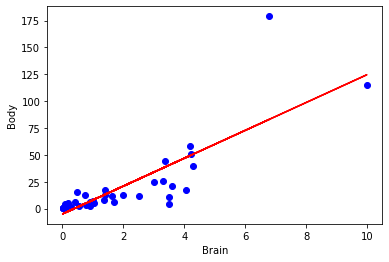

In [56]:
plt.scatter(X, y, color = 'b')
plt.plot(X, lr.predict(X), color = 'r')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [57]:
lr.score(X, y)

0.6751049676918485

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [58]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [60]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [61]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


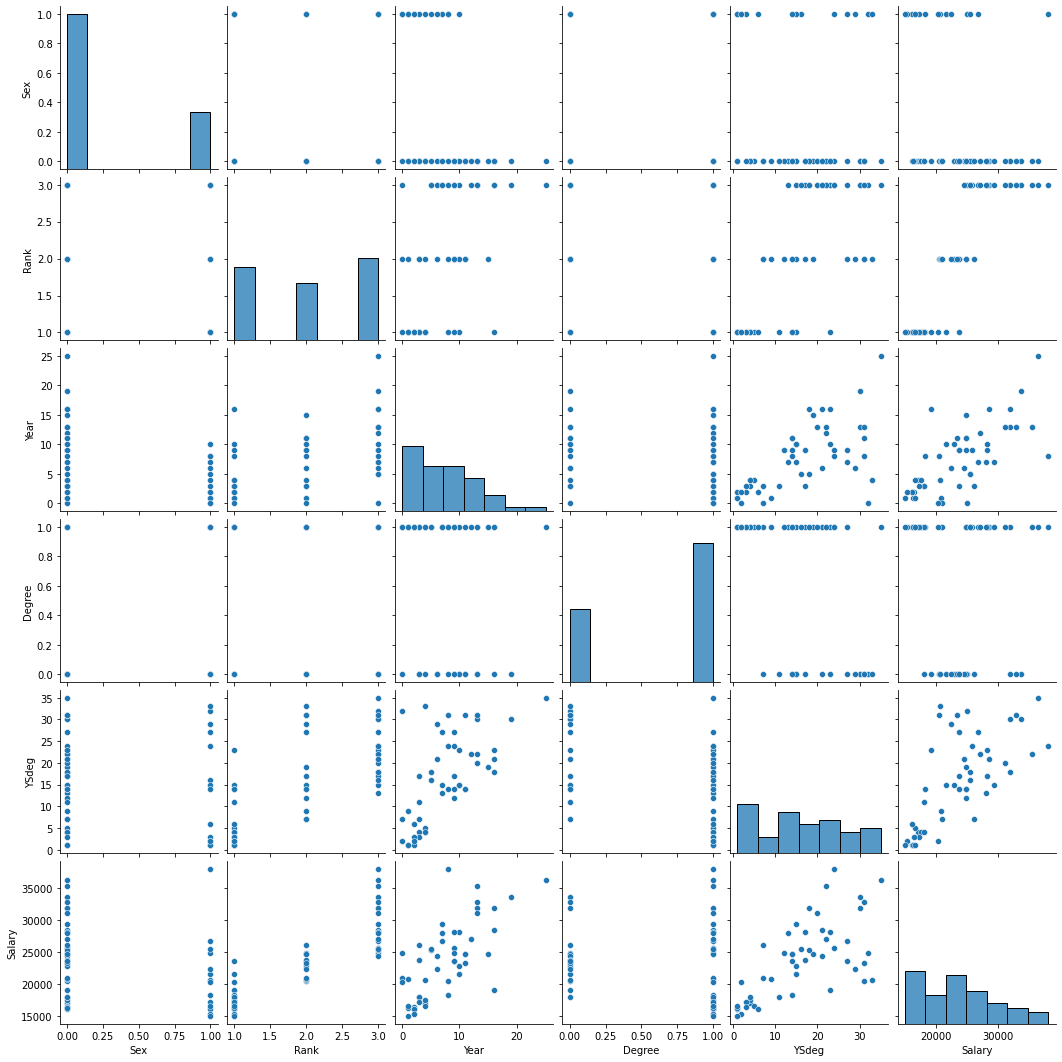

In [62]:
sns.pairplot(df)

In [63]:
print(df['Sex'].value_counts())
print(df['Rank'].value_counts())
print(df['Degree'].value_counts())

0    38
1    14
Name: Sex, dtype: int64
3    20
1    18
2    14
Name: Rank, dtype: int64
1    34
0    18
Name: Degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


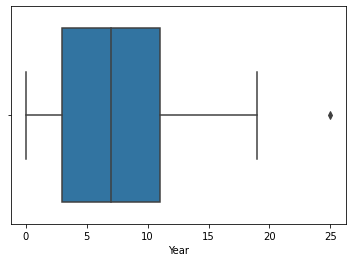

In [64]:
sns.boxplot(df['Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


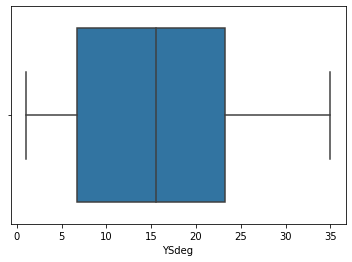

In [65]:
sns.boxplot(df['YSdeg'])

In [66]:
print(df['Sex'].corr(df['Rank']))
print(df['Sex'].corr(df['Year']))
print(df['Sex'].corr(df['Degree']))
print(df['Sex'].corr(df['YSdeg']))
print(df['Sex'].corr(df['Salary']))
#How to find correlations between discrete and continuous values? 

-0.23041074678259899
-0.37940393574160103
0.07711185475904833
-0.0882880449113312
-0.2527823685166353


In [67]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()  

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(X_test)
print(y_test)
print(y_pred)

[25500 16700 16150 38045 23713 19175 26775 23300 20525 16686 31909]
[27015.56873913 17457.75716614 16675.21896495 27717.50368419
 20359.28449935 22844.82428526 26986.60271837 24711.06473068
 23307.59192567 16645.85585908 31745.44865786]


In [74]:
score = r2_score(y_test, y_pred)    
score

0.6937884635588025

In [75]:
intercept = lr.intercept_
coeff = lr.coef_

In [76]:
print(intercept)
print(coeff)

12469.657692177998
[  240.80256798  4906.89964705   467.82426834 -1351.63608397
   -87.69223249]


**y = 12469.66 + 240.80X1 + 4906.90X2 + 467.82X3 - 1351.65X4 - 87.69X5 <br>
salary = 12469.66 + 240.80(sex) + 4906.90(rank) + 467.82(year) - 1351.65(degree) - 87.69(ysdegree)**

In [77]:
#Feature importance - rank > degree > year > sex > ysdegree

In [78]:
X1 = df[['Rank', 'Degree']].to_numpy()
y1 = df.iloc[:, -1].to_numpy()

In [79]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)

In [80]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()  

In [81]:
lr1.fit(X1_train, y1_train)

LinearRegression()

In [82]:
y1_pred = lr1.predict(X1_test)
print(y1_test)
print(y1_pred)

[25500 16700 16150 38045 23713 19175 26775 23300 20525 16686 31909]
[29161.52906055 17301.21168019 17301.21168019 29161.52906055
 17924.30730479 17924.30730479 29161.52906055 23854.46599496
 23854.46599496 17301.21168019 29161.52906055]


In [83]:
score1 = r2_score(y1_test, y1_pred)    
score1

0.6730557645418598